In [1]:
import pandas as pd
from sklearn.datasets import make_blobs


In [2]:
X, _ = make_blobs(n_samples=500, centers=4, n_features=2, random_state=42)
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])


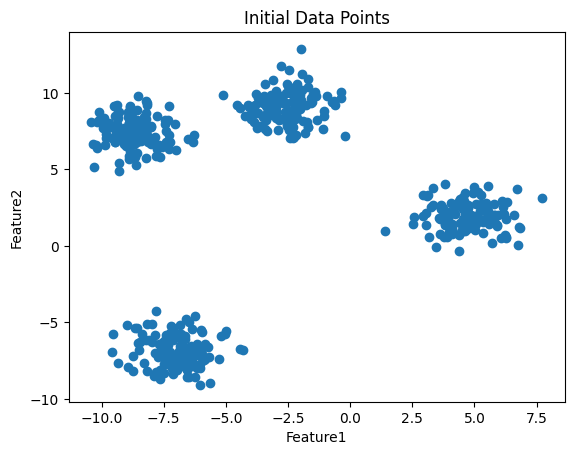

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df['Feature1'], df['Feature2'])
plt.title("Initial Data Points")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()


In [4]:
pip install pycaret

In [5]:
from pycaret.clustering import setup, create_model, assign_model


In [6]:
cluster_setup = setup(df, normalize=True, session_id=123)


,Description,Value
0,Session id,123
1,Original data shape,"(500, 2)"
2,Transformed data shape,"(500, 2)"
3,Numeric features,2
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [7]:
models = []
params = [(0.3, 5), (0.5, 5), (0.3, 10), (0.5, 10)]
for eps, samples in params:
    model = create_model('dbscan', eps=eps, min_samples=samples)
    models.append(model)


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7979,5578.0116,0.2819,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7466,1891.9757,0.3651,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7979,5578.0116,0.2819,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7466,1891.9757,0.3651,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

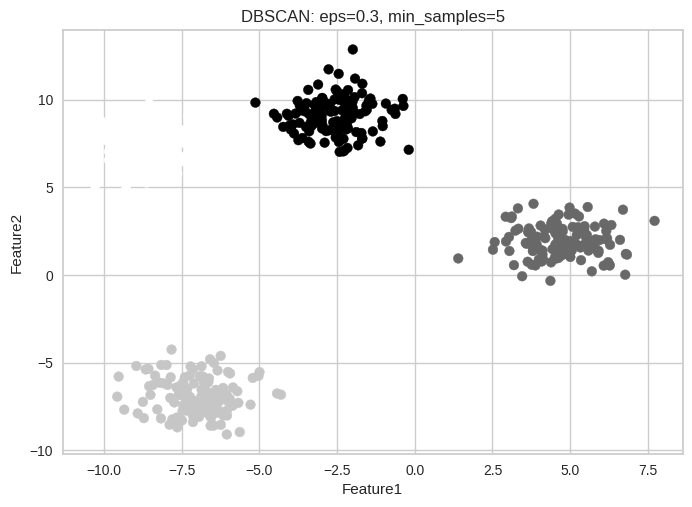

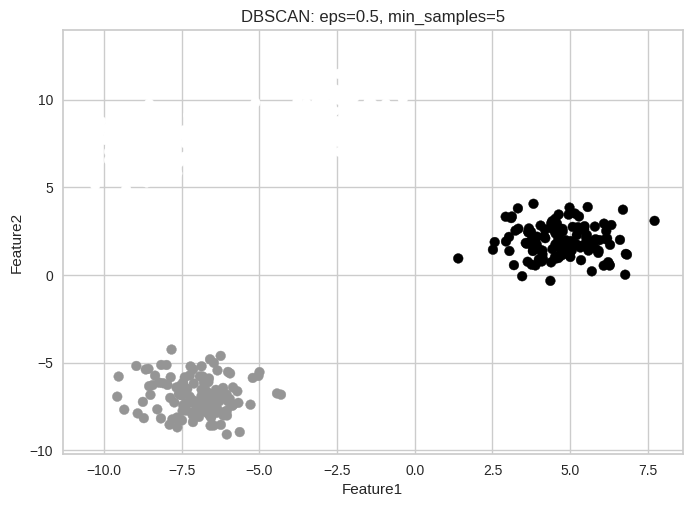

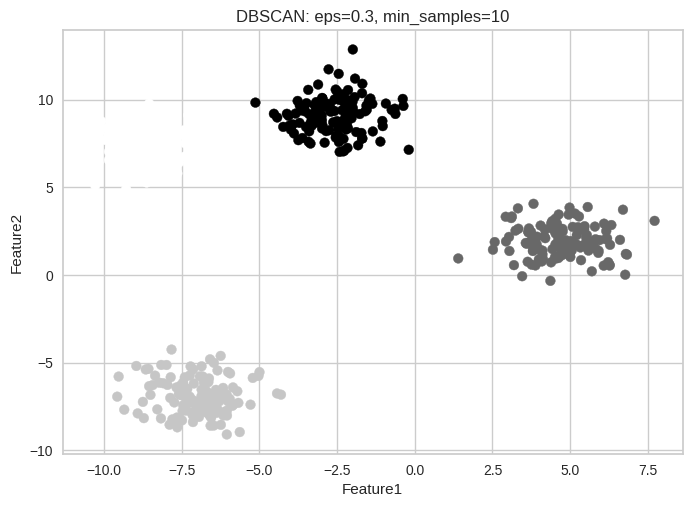

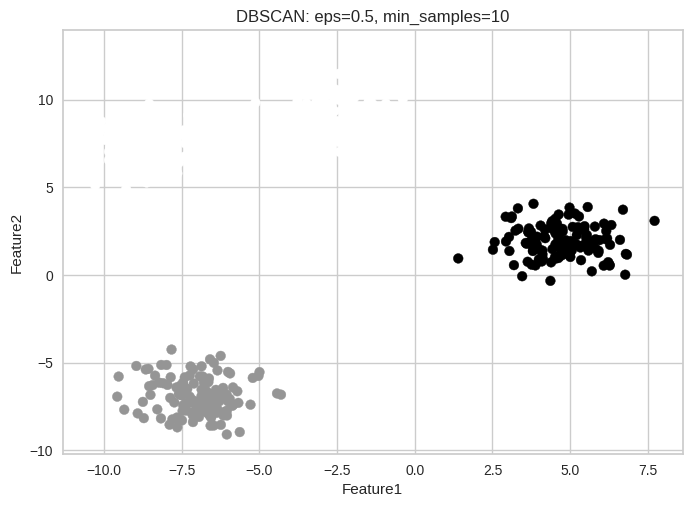

In [10]:
import pandas as pd

for model in models:
    assigned_df = assign_model(model)

    # Check if the cluster labels are strings and extract the numerical part
    if assigned_df['Cluster'].dtype == object:
        df['Cluster'] = assigned_df['Cluster'].str.extract('(\d+)').astype(int)
    else:
        df['Cluster'] = assigned_df['Cluster']

    # Visualization
    plt.figure()
    plt.scatter(df['Feature1'], df['Feature2'], c=df['Cluster'])
    plt.title(f"DBSCAN: eps={model.eps}, min_samples={model.min_samples}")
    plt.xlabel("Feature1")
    plt.ylabel("Feature2")
    plt.show()


In [13]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Example for one model
filtered_df = df[df['Cluster'] != -1]  # Excluding noise points
silhouette = silhouette_score(filtered_df[['Feature1', 'Feature2']], filtered_df['Cluster'])
calinski_harabasz = calinski_harabasz_score(filtered_df[['Feature1', 'Feature2']], filtered_df['Cluster'])
davies_bouldin = davies_bouldin_score(filtered_df[['Feature1', 'Feature2']], filtered_df['Cluster'])
print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")


Silhouette Score: 0.7613478432173022
Calinski-Harabasz Index: 2210.4864672367803
Davies-Bouldin Index: 0.3486087828469257
